<a href="https://colab.research.google.com/github/mohammad2682/Covid-19/blob/master/CNN-V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

In [4]:
!git clone https://github.com/mohammad2682/Covid19-Dataset

Cloning into 'Covid19-Dataset'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2523 (delta 6), reused 0 (delta 0), pack-reused 2502
Receiving objects: 100% (2523/2523), 229.95 MiB | 36.28 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (4965/4965), done.


In [5]:
datadir = "Covid19-Dataset/Covid-19-Dataset/train/COVID/"
Covid=[]
for img in os.listdir(datadir):
    img_array = cv2.imread(os.path.join(datadir,img),0)
    Covid.append([img_array])

In [23]:
datadir1 = "Covid19-Dataset/Covid-19-Dataset/train/non-COVID/"
nonCovid=[]
for img in os.listdir(datadir1):
    img_array1 = cv2.imread(os.path.join(datadir1,img),0)
    nonCovid.append([img_array1])

(338, 439)


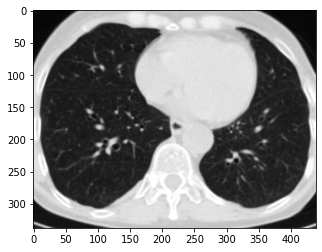

In [24]:
img=nonCovid[1]
img=img[0]
print(img.shape)
plt.imshow(img, cmap='gray')

(222, 324)


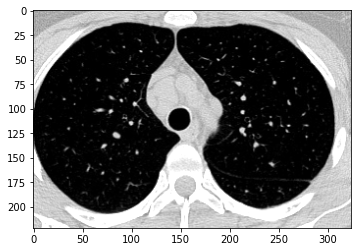

In [31]:
img=Covid[7]
img=img[0]
print(img.shape)
plt.imshow(img, cmap='gray')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (7, 7), input_shape = (128, 128, 1)))
classifier.add(Dropout(0.3))
#classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(64, (7, 7), activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(128, (7, 7), activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(GlobalAveragePooling2D())
# Step 3 - Flattening
#classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 122, 122, 32)      1600      
_________________________________________________________________
dropout_16 (Dropout)         (None, 122, 122, 32)      0         
_________________________________________________________________
activation_5 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 55, 55, 64)        100416    
_________________________________________________________________
dropout_17 (Dropout)         (None, 55, 55, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 27, 27, 64)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/train',
                                                    target_size = (128, 128),
                                                    color_mode="grayscale",
                                                    shuffle=True,
                                                    batch_size = 32,
                                                    class_mode = 'binary')
test_set = test_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/test',
                                              target_size = (128, 128),
                                              color_mode="grayscale",
                                              shuffle=True,
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

history = classifier.fit_generator(training_set,
                          steps_per_epoch = np.ceil(2000/32),
                          epochs = 50,
                          callbacks=[annealer, checkpoint],
                          validation_data = test_set,
                          validation_steps = np.ceil(482/32))

Epoch 1/50
63/63 [==============================] - 16s 248ms/step - loss: 0.6959 - accuracy: 0.4865 - val_loss: 0.6991 - val_accuracy: 0.5415

Epoch 00001: val_loss improved from inf to 0.69913, saving model to model.h5
Epoch 2/50
63/63 [==============================] - 15s 233ms/step - loss: 0.6938 - accuracy: 0.4930 - val_loss: 0.6949 - val_accuracy: 0.6369

Epoch 00002: val_loss improved from 0.69913 to 0.69486, saving model to model.h5
Epoch 3/50
63/63 [==============================] - 14s 228ms/step - loss: 0.6916 - accuracy: 0.5215 - val_loss: 0.6944 - val_accuracy: 0.5228

Epoch 00003: val_loss improved from 0.69486 to 0.69440, saving model to model.h5
Epoch 4/50
63/63 [==============================] - 14s 226ms/step - loss: 0.6921 - accuracy: 0.5075 - val_loss: 0.6904 - val_accuracy: 0.5290

Epoch 00004: val_loss improved from 0.69440 to 0.69044, saving model to model.h5
Epoch 5/50
63/63 [==============================] - 15s 231ms/step - loss: 0.6916 - accuracy: 0.5195 - v

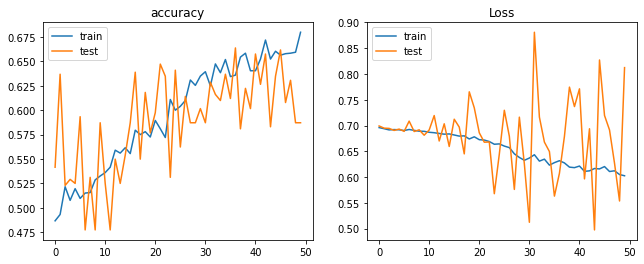

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('Loss')
plt.legend()
plt.subplots_adjust(right = 1.5)
plt.show()

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('Covid19-Dataset/Covid-19-Dataset/test/nonCOVID/Non-Covid (857).png', target_size = (128, 128), color_mode = 'grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

In [ ]:
if result[0][0]==1:
  print('non Covid')
else:
  print('Covid')

Covid


In [ ]:
classifier.save('first_RUN.h5')

In [ ]:
result = classifier.predict(test_set)
y_test = np.zeros((482,1))
y_test[252:482] = 1
r = abs(np.round(result)-y_test).sum()
(482-r)/482

0.483402489626556

In [ ]:
result = classifier.predict(training_set)
y_train = np.zeros((2000,1))
y_train[1000:2000] = 1
r = abs(np.round(result)-y_train).sum()
(2000-r)/2000

0.5005